# Imports

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from datetime import datetime
import tclab

import os

import tkinter as tk

import package_DBR
from package_DBR import myRound

# Parameters

In [62]:
Ts = 1

ExpVariable = "DV"

MV0 = 50
DV0 = 50
Delta = 20 

NumSteps = 1

# Functions

In [63]:
# Create a function to update the plot
def update_plot(t, MV, PV, DV):
    l1.set_data(t,MV)
    l2.set_data(t,PV)
    l3.set_data(t,DV)    
    
    ax1.set_xlim(0, t[-1])
    ax2.set_xlim(0, t[-1])
    ax3.set_xlim(0, t[-1])    
    
    ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
    ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
    ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)    
    
    clear_output(wait=True)     
    display(fig)    

# Create a function to pause the plot
def interact_update():
    global t, MV, PV, DV, Step, MVValue, DVValue
    
    if Step == 0:
        t = np.array([0])
        MV = np.array([MVValue])
        DV = np.array([DVValue])        
        PV = np.array([lab.T1])
    else:
        if Step == NumSteps + 1:
            root.destroy()
        else:    
            if ExpVariable == "MV":
                if MVValue == MV0 - Delta:
                    MVValue = MV0 + Delta
                else:
                    MVValue = MV0 - Delta                
            else:            
                if DVValue == DV0 - Delta:
                    DVValue = DV0 + Delta
                else:
                    DVValue = DV0 - Delta
            lab.Q1(MVValue)
            lab.Q2(DVValue)                 
        
    Step += 1
    
# Define a function to update the plot and check for button events
def update_plot_and_check_events():
    global t, MV, PV, DV, MVValue, DVValue
    
    # Check for button events
    root.update()
    root.after(Ts*1000, update_plot_and_check_events)     
    
    # Update the data arrays
    t = np.append(t, t[-1] + Ts)
    MV = np.append(MV, MVValue)
    DV = np.append(DV, DVValue)           
    PV = np.append(PV, lab.T1)       

    # Update the plot
    update_plot(t, MV, PV, DV)

# Main program

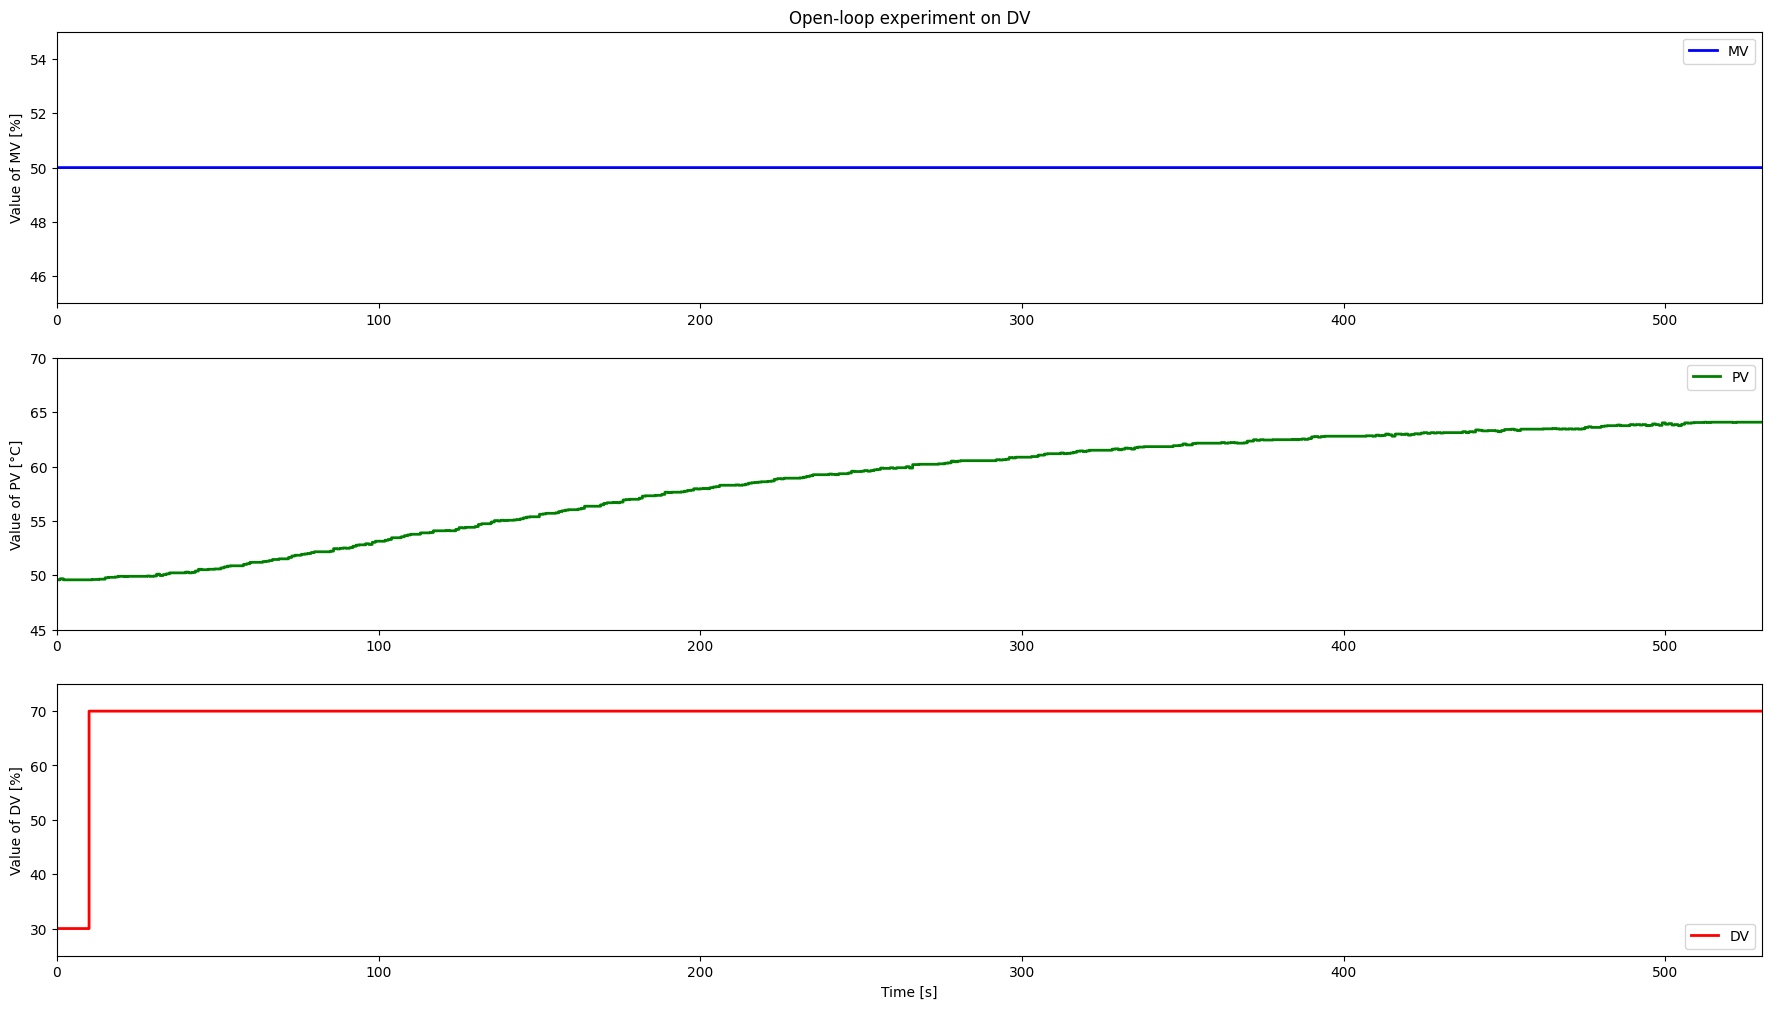

TCLab disconnected successfully.


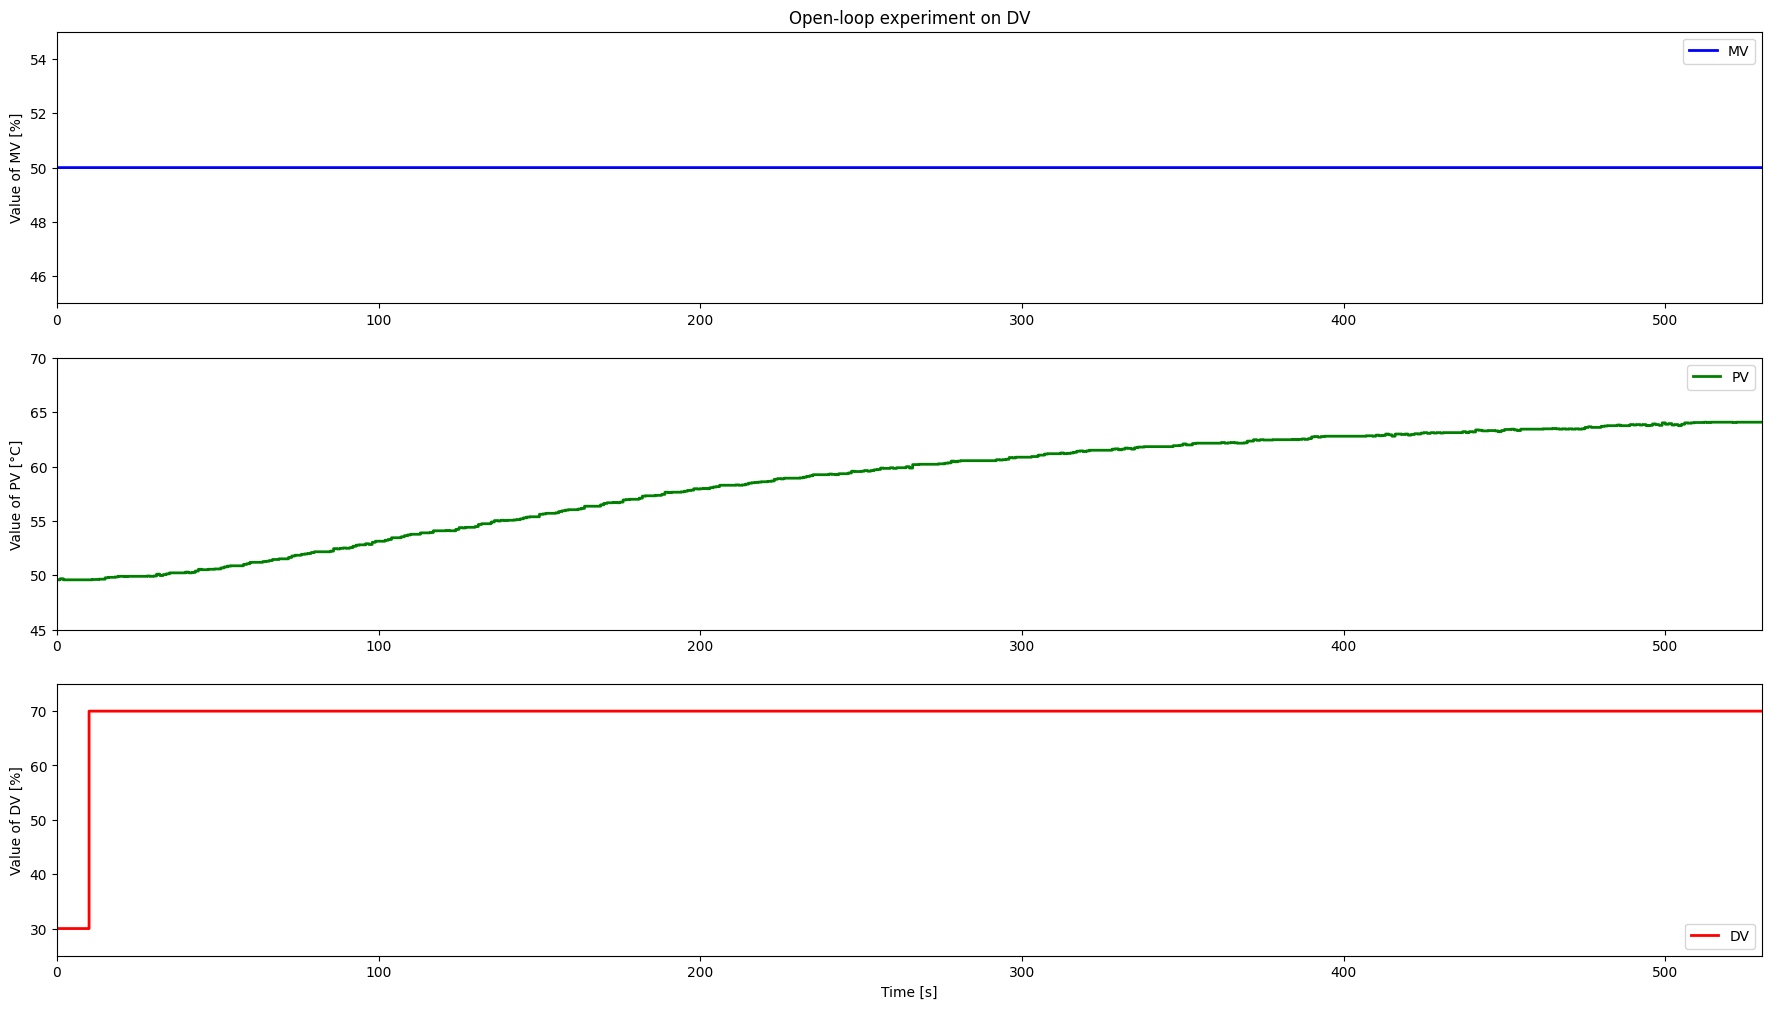

In [64]:
Step = 0

if ExpVariable == "MV":
    MVValue = MV0 - Delta
    DVValue = DV0        
else:            
    MVValue = MV0
    DVValue = DV0 - Delta

# Main figure with axes
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title('Open-loop experiment on ' + ExpVariable)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best') 

# Connect to the TCLab device
with tclab.TCLab() as lab:
    lab.Q1(MVValue)
    lab.Q2(DVValue)                
    
    t = np.array([0])
    MV = np.array([MVValue])
    DV = np.array([DVValue])    
    PV = np.array([lab.T1])  

    # Set up the tkinter root window and button
    root = tk.Tk()
    root.geometry("200x50")
    interact_button = tk.Button(root, text = "Interact", command = interact_update)
    interact_button.pack()

    # Start the update loop
    update_plot_and_check_events()
    root.mainloop()

# Save data    
now = datetime.now()
date_time = now.strftime("%Y-%m-%d-%Hh%M")
my_data = np.vstack((t.T,MV.T,PV.T,DV.T))
my_data = my_data.T
nameFile = 'Data/Open_loop_experiment_on_' + ExpVariable + '_' + date_time + '.txt'
if not os.path.exists('Data'):
    os.makedirs('Data')
np.savetxt(nameFile,my_data,delimiter=',',header='t,MV,PV,DV',comments='')    